     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

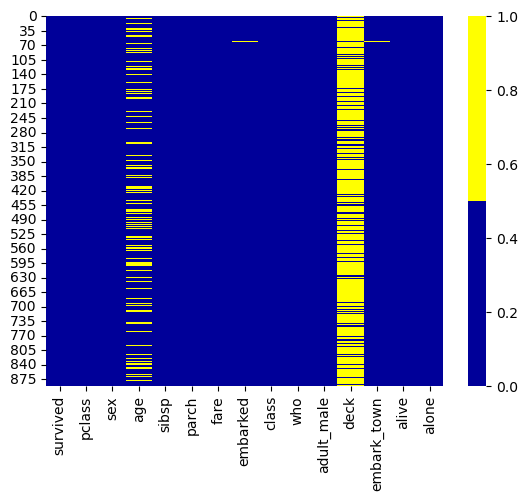

In [7]:

# KNN stands for K-Nearest Neighbors, a simple algorithm that makes predictions based on a defined number of 
# nearest neighbors. It calculates distances from an instance you want to classify to every other instance in 
# the dataset. 

# In this example, classification means imputation.

# Since KNN is a distance-based algorithm, you should consider scaling your dataset. You’ll see how in a bit.

# Advantages: KNN imputation is easy to implement and optimize, and it also seems “smarter” than the previous 
# techniques.

# Disadvantages: It is sensitive to outliers due to the Euclidean distance formula. It can’t be applied to 
# categorical data, and can be computationally expensive on large datasets.


import pandas as pd
import seaborn as sns


# Load data
df = pd.read_csv('C:\\Users\\titanic.csv')
print(df)
list(df)
df.dtypes


# visualize what's missing
colours = ['#000099', '#ffff00']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

from sklearn.preprocessing import MinMaxScaler

# Original dataset
df = df[['survived', 'pclass', 'sibsp', 'parch', 'fare', 'age']]
df.head()

print(df.isnull().sum())
print(df.isnull().sum().sum())


In [3]:

data_original = df.copy()

# Scaled dataset
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_original)
data_scaled = pd.DataFrame(data=data_scaled, columns=data_original.columns)
data_scaled.head()


,survived,pclass,sibsp,parch,fare,age
0,0.0,1.0,0.125,0.0,0.014151,0.271174
1,1.0,0.0,0.125,0.0,0.139136,0.472229
2,1.0,1.0,0.000,0.0,0.015469,0.321438
3,1.0,0.0,0.125,0.0,0.103644,0.434531
4,0.0,1.0,0.000,0.0,0.015713,0.434531


In [4]:

# After the imputation, we’ll have to use the inverse_transform() function from MinMaxScaler to bring the 
# scaled dataset in the original form.

from sklearn.impute import KNNImputer

# Impute
imputer_orig = KNNImputer(n_neighbors=3)
imputed_orig = imputer_orig.fit_transform(data_original)

imputer_scaled = KNNImputer(n_neighbors=3)
imputed_scaled = imputer_scaled.fit_transform(data_scaled)

# Convert to DataFrames
imputed_orig = pd.DataFrame(data=imputed_orig, columns=data_original.columns)
imputed_scaled = pd.DataFrame(data=imputed_scaled, columns=data_original.columns)

# Inverse the scaling
imputed_scaled = scaler.inverse_transform(imputed_scaled)
imputed_scaled = pd.DataFrame(data=imputed_scaled, columns=data_original.columns)

print(imputed_scaled.isnull().sum())
print(imputed_scaled.isnull().sum().sum())

imputed_scaled


survived    0
pclass      0
sibsp       0
parch       0
fare        0
age         0
dtype: int64
0


,survived,pclass,sibsp,parch,fare,age
0,0.0,3.0,1.0,0.0,7.2500,22.000000
1,1.0,1.0,1.0,0.0,71.2833,38.000000
2,1.0,3.0,0.0,0.0,7.9250,26.000000
3,1.0,1.0,1.0,0.0,53.1000,35.000000
4,0.0,3.0,0.0,0.0,8.0500,35.000000
...,...,...,...,...,...,...
886,0.0,2.0,0.0,0.0,13.0000,27.000000
887,1.0,1.0,0.0,0.0,30.0000,19.000000
888,0.0,3.0,1.0,2.0,23.4500,25.666667
889,1.0,1.0,0.0,0.0,30.0000,26.000000


In [8]:

# Result:
# We went from 177 missing records in the 'age' field to 0 missing records in the 'age' field. Nice!!
